In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_wine


In [32]:
data=load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [33]:
data["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [34]:
data["data"]

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [35]:
df=pd.DataFrame(data["data"],columns=data["feature_names"])

In [36]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [37]:
df["target"]=data["target"]

In [38]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [39]:
X=df.iloc[:,:-1]

In [40]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [41]:
Y=df["target"]

In [43]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=df["target"])

In [48]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((119, 13), (59, 13), (119,), (59,))

In [49]:
df["target"].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

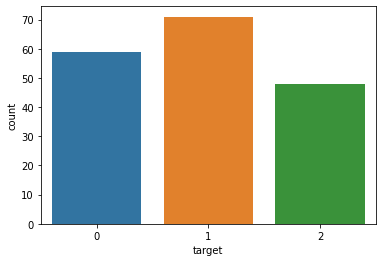

In [56]:
import seaborn as sns
sns.countplot(df["target"])

In [57]:
pipeline=Pipeline([("dclf", DecisionTreeClassifier())])

In [81]:
parameters={"dclf__max_depth":[2,5,8],"dclf__min_samples_leaf":[1,2,3]}

In [82]:
grid_search=GridSearchCV(pipeline, parameters, n_jobs=-1, scoring="accuracy", verbose=1)

In [83]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.9s finished


GridSearchCV(estimator=Pipeline(steps=[('dclf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dclf__max_depth': [2, 5, 8],
                         'dclf__min_samples_leaf': [1, 2, 3]},
             scoring='accuracy', verbose=1)

In [90]:
y_predict=grid_search.predict(X_test)

In [91]:
y_predict

array([1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0])

In [92]:
grid_search.best_score_

0.9166666666666667

In [93]:
grid_search.best_params_

{'dclf__max_depth': 8, 'dclf__min_samples_leaf': 1}

In [95]:
grid_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('dclf', DecisionTreeClassifier(max_depth=8))],
 'verbose': False,
 'dclf': DecisionTreeClassifier(max_depth=8),
 'dclf__ccp_alpha': 0.0,
 'dclf__class_weight': None,
 'dclf__criterion': 'gini',
 'dclf__max_depth': 8,
 'dclf__max_features': None,
 'dclf__max_leaf_nodes': None,
 'dclf__min_impurity_decrease': 0.0,
 'dclf__min_impurity_split': None,
 'dclf__min_samples_leaf': 1,
 'dclf__min_samples_split': 2,
 'dclf__min_weight_fraction_leaf': 0.0,
 'dclf__presort': 'deprecated',
 'dclf__random_state': None,
 'dclf__splitter': 'best'}

In [96]:
cmt=confusion_matrix(Y_test, y_predict)

In [97]:
cmt

array([[19,  1,  0],
       [ 0, 23,  0],
       [ 0,  0, 16]], dtype=int64)

In [99]:
accuracy_score(Y_test, y_predict)

0.9830508474576272

In [100]:
classification_report(Y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.97        20\n           1       0.96      1.00      0.98        23\n           2       1.00      1.00      1.00        16\n\n    accuracy                           0.98        59\n   macro avg       0.99      0.98      0.98        59\nweighted avg       0.98      0.98      0.98        59\n'